## **Task 2**

**Perform the necessary pre-processing on the dataset and conduct exploratory data analysis to gain insights into the data. Apply Random Forest to classify the species, plot the tree and evaluate its performance by displaying key metrics and perform hyperparameter tuning. [ The dataset has class imbalance make sure to handle it]**



#### Steps to follow: 

1. Pre-processing and EDA
2. Managing null values
3. Model Fitting
4. Evaluate Performance

### **1. Pre-processing and EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Programming\djs-compute-tasks\DJS-compute-tasks\Task 4\Random Forest\Data\random_Forest.csv')

In [3]:
df.head(10)

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C
5,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-5,C
6,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-6,C
7,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-7,C
8,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-8,C
9,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-9,C


In [4]:
df.shape

(777715, 20)

In [5]:
df.isna().sum()

ID                          0
gender                      0
has_car                     0
has_home                    0
no_of_children              0
total_income                0
income_status               0
highest_education           0
relationship_status         0
house_type                  0
dob_count                   0
days_employed_Count         0
has_mobile                  0
has_work_phone              0
has_Any_phone               0
email_given                 0
job_type               240048
family_size                 0
record_month_count          0
def_status                  0
dtype: int64

In [6]:
df['job_type'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [7]:
df['dob_count']

0        -12005
1        -12005
2        -12005
3        -12005
4        -12005
          ...  
777710    -9188
777711    -9188
777712    -9188
777713    -9188
777714    -9188
Name: dob_count, Length: 777715, dtype: int64

In [8]:
df.dtypes

ID                       int64
gender                  object
has_car                 object
has_home                object
no_of_children           int64
total_income           float64
income_status           object
highest_education       object
relationship_status     object
house_type              object
dob_count                int64
days_employed_Count      int64
has_mobile               int64
has_work_phone           int64
has_Any_phone            int64
email_given              int64
job_type                object
family_size              int64
record_month_count       int64
def_status              object
dtype: object

In [9]:
print(df['gender'].unique())
print(df['has_car'].unique())
print(df['has_home'].unique())

['M' 'F']
['Y' 'N']
['Y' 'N']


In [10]:
df['gender'] = df['gender'].map({'M' : 1, 'F': 0})

In [11]:
df['has_car'] = df['has_car'].map({'Y' : 1, 'N': 0})

In [12]:
df['has_home'] = df['has_home'].map({'Y' : 1, 'N': 0})

In [13]:
df.dtypes

ID                       int64
gender                   int64
has_car                  int64
has_home                 int64
no_of_children           int64
total_income           float64
income_status           object
highest_education       object
relationship_status     object
house_type              object
dob_count                int64
days_employed_Count      int64
has_mobile               int64
has_work_phone           int64
has_Any_phone            int64
email_given              int64
job_type                object
family_size              int64
record_month_count       int64
def_status              object
dtype: object

In [14]:
df['income_status'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [15]:
df['highest_education'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [16]:
df['relationship_status'].unique()

array(['Civil marriage', 'Married', 'Single / not married', 'Separated',
       'Widow'], dtype=object)

In [17]:
df['house_type'].unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [18]:
labelenc = ['income_status', 'highest_education', 'relationship_status', 'house_type', 'job_type']

**These 4 can be label encoded**

In [19]:
df['has_mobile'].unique() # can be dropped

array([1])

In [20]:
df['has_work_phone'].unique()

array([1, 0])

In [21]:
df['has_Any_phone'].unique()

array([0, 1])

In [22]:
df['email_given'].unique()

array([0, 1])

In [23]:
df['job_type'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [24]:
df['record_month_count'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60])

In [25]:
df['def_status'].unique()

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [26]:
df['def_status'].value_counts()

def_status
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

### **2. Missing Null Values**

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [28]:
df_nonull = df.dropna().copy()

In [29]:
df_nonull.head(5)

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
31,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,0,C
32,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-1,C
33,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-2,C
34,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-3,C
35,5008806,1,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2,-4,C


In [30]:
df_nonull.shape

(537667, 20)

In [31]:
df_nonull.dtypes

ID                       int64
gender                   int64
has_car                  int64
has_home                 int64
no_of_children           int64
total_income           float64
income_status           object
highest_education       object
relationship_status     object
house_type              object
dob_count                int64
days_employed_Count      int64
has_mobile               int64
has_work_phone           int64
has_Any_phone            int64
email_given              int64
job_type                object
family_size              int64
record_month_count       int64
def_status              object
dtype: object

In [32]:
df

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,0,C
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-1,C
2,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-2,C
3,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-3,C
4,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-9,0
777711,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-10,2
777712,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-11,1
777713,5150337,1,0,1,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1,-12,0


In [33]:
from sklearn.model_selection import train_test_split

for column in labelenc:
    df_nonull[column] = le.fit_transform(df_nonull[column])
    
X = df_nonull.drop(columns = ['def_status'])
y = df_nonull['def_status']

x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=2342)

In [34]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     60321
           1       0.32      0.26      0.28      1910
           2       0.15      0.12      0.14       164
           3       0.03      0.02      0.02        63
           4       0.10      0.06      0.08        48
           5       0.88      0.85      0.87       316
           C       0.95      0.95      0.95     67785
           X       0.84      0.80      0.82     30694

    accuracy                           0.88    161301
   macro avg       0.51      0.49      0.50    161301
weighted avg       0.88      0.88      0.88    161301



**This models' performance is very bad so we will try to manage the null values better and handle class imbalance related issues.**

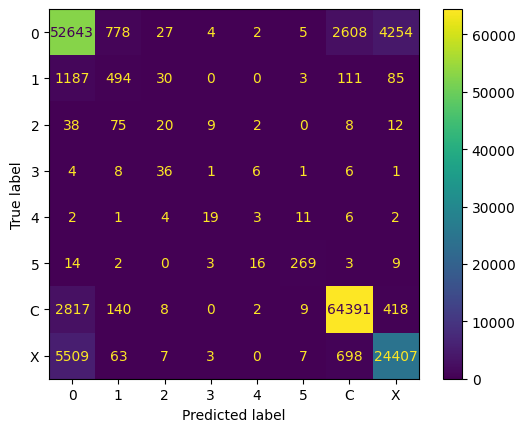

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=clf.classes_)
disp.plot()
plt.show()

**This confusion matrix shows a lot of false values, shows just how much room there is for the model to improve.**

In [37]:
import pickle

with open('rfc_imbalanced.pkl', 'wb') as file:
    pickle.dump(clf, file)

#### **Now we will try to impute values using a RFC model**

In [38]:
df_null = df[df.isnull().any(axis=1)]

In [39]:
df_null.isna().sum()

ID                          0
gender                      0
has_car                     0
has_home                    0
no_of_children              0
total_income                0
income_status               0
highest_education           0
relationship_status         0
house_type                  0
dob_count                   0
days_employed_Count         0
has_mobile                  0
has_work_phone              0
has_Any_phone               0
email_given                 0
job_type               240048
family_size                 0
record_month_count          0
def_status                  0
dtype: int64

In [40]:
df_null.shape

(240048, 20)

In [41]:
newlabelenc = ['income_status', 'highest_education', 'relationship_status', 'house_type', 'def_status']
newlabelenc_nojob = ['income_status', 'highest_education', 'relationship_status', 'house_type', 'def_status']
    

In [42]:
df_nonull2 = df.dropna().copy()

In [43]:
df_nonull2.isna().sum()

ID                     0
gender                 0
has_car                0
has_home               0
no_of_children         0
total_income           0
income_status          0
highest_education      0
relationship_status    0
house_type             0
dob_count              0
days_employed_Count    0
has_mobile             0
has_work_phone         0
has_Any_phone          0
email_given            0
job_type               0
family_size            0
record_month_count     0
def_status             0
dtype: int64

In [44]:
df_nonull2['job_type'].unique()

array(['Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

**So now we will train a model from the non null dataset to predict the job type, with this trained model we will predict the job types which are currently null and replace the null values with our predictions**

In [45]:
encodersnonull = {}

for column in newlabelenc:
    le = LabelEncoder()
    df_nonull2.loc[:, column] = le.fit_transform(df_nonull2[column])
    encodersnonull[column] = le
    
encodersnull = {}
for column in newlabelenc_nojob:
    le = LabelEncoder()

    df_null.loc[:, column] = le.fit_transform(df_null[column])
    encodersnull[column] = le


In [46]:
df_null.head()

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2,0,6
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2,-1,6
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2,-2,6
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2,-3,6
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,NaN,2,-4,6


In [47]:
df_nonull2.head()

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
31,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2,0,6
32,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2,-1,6
33,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2,-2,6
34,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2,-3,6
35,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,Security staff,2,-4,6


In [48]:
imputerclf = RandomForestClassifier(n_jobs = -1)

X = df_nonull2.drop(columns=['job_type'])
y = df_nonull2['job_type']
y.unique()

array(['Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [49]:
X.head(10)

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,family_size,record_month_count,def_status
31,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,0,6
32,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-1,6
33,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-2,6
34,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-3,6
35,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-4,6
36,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-5,6
37,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-6,6
38,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-7,7
39,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-8,0
40,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,1,0,0,0,2,-9,0


In [50]:
imputerclf.fit(X,y)

RandomForestClassifier(n_jobs=-1)

In [51]:
print(encodersnonull)
print(encodersnull)

{'income_status': LabelEncoder(), 'highest_education': LabelEncoder(), 'relationship_status': LabelEncoder(), 'house_type': LabelEncoder(), 'def_status': LabelEncoder()}
{'income_status': LabelEncoder(), 'highest_education': LabelEncoder(), 'relationship_status': LabelEncoder(), 'house_type': LabelEncoder(), 'def_status': LabelEncoder()}


In [52]:
imputed_Predictions = imputerclf.predict(df_null.drop(columns=['job_type']))

In [53]:
df_null.loc[:, 'job_type'] = imputed_Predictions

##### **Now the dataframe is updated with predicted values for the 'job_type' attribute**

In [54]:
df_null.head(10)

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,0,6
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-1,6
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-2,6
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-3,6
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-4,6
5,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-5,6
6,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-6,6
7,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-7,6
8,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-8,6
9,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,Managers,2,-9,6


In [55]:
len(df_null['job_type'].unique())

14

In [56]:
df_null.shape

(240048, 20)

In [57]:
df_nonull2.shape

(537667, 20)

In [58]:
final_df = pd.concat([df_null , df_nonull2])

In [59]:
final_df.isna().sum()

ID                     0
gender                 0
has_car                0
has_home               0
no_of_children         0
total_income           0
income_status          0
highest_education      0
relationship_status    0
house_type             0
dob_count              0
days_employed_Count    0
has_mobile             0
has_work_phone         0
has_Any_phone          0
email_given            0
job_type               0
family_size            0
record_month_count     0
def_status             0
dtype: int64

**The trial of imputing with RFC ends here, now we train another RFC for this final dataframe after using SMOTE to balance the target values**

In [60]:
final_df['def_status'].unique()

array([6, 1, 0, 7, 5, 4, 3, 2], dtype=object)

In [61]:
final_df['def_status'].value_counts()

def_status
6    329536
0    290654
7    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

In [62]:
df['def_status'].value_counts()

def_status
C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: count, dtype: int64

##### **Now using Imblearn to upsample the imbalanced dataset to have a more balanced target column.**

In [63]:
from imblearn.over_sampling import RandomOverSampler

print(final_df['def_status'].isnull().sum())

final_df = final_df.dropna(subset=['def_status'])


final_df['def_status'] = final_df['def_status'].astype('category')

X = final_df.drop(columns=['def_status'])  
y = final_df['def_status']  

0


In [64]:
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)

X_res, y_res = ros.fit_resample(X, y)

In [65]:
final_df_upsampled = pd.concat([X_res, y_res], axis=1)

print(final_df_upsampled['def_status'].value_counts())

def_status
0    329536
1    329536
2    329536
3    329536
4    329536
5    329536
6    329536
7    329536
Name: count, dtype: int64


##### **Encoding the categorical values again to train a final model**

In [66]:
newlabelenc = ['income_status', 'highest_education', 'relationship_status', 'house_type', 'def_status', 'job_type']

label_encoders = {}

for column in newlabelenc:
    le = LabelEncoder()
    final_df_upsampled[column] = le.fit_transform(final_df_upsampled[column])
    label_encoders[column] = le

### **3. Fitting the Model**

In [67]:
main_clf = RandomForestClassifier(n_jobs=-1)

X = final_df_upsampled.drop(columns = ['def_status'])
y = final_df_upsampled['def_status']

In [68]:
x_trainf, x_testf, y_trainf, y_testf = train_test_split(X,y, test_size=0.4, random_state=234)

In [69]:
final_df_upsampled.head()

,ID,gender,has_car,has_home,no_of_children,total_income,income_status,highest_education,relationship_status,house_type,dob_count,days_employed_Count,has_mobile,has_work_phone,has_Any_phone,email_given,job_type,family_size,record_month_count,def_status
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,10,2,0,6
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,10,2,-1,6
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,10,2,-2,6
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,10,2,-3,6
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,10,2,-4,6


In [70]:
corrma = final_df_upsampled.corr()

In [71]:
final_df_upsampled.shape

(2636288, 20)

In [72]:
main_clf.fit(x_trainf, y_trainf)

RandomForestClassifier(n_jobs=-1)

Classification Evaluation Metrics:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


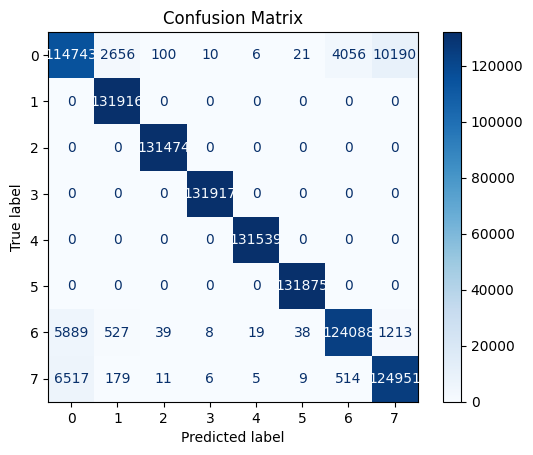


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89    131782
           1       0.98      1.00      0.99    131916
           2       1.00      1.00      1.00    131474
           3       1.00      1.00      1.00    131917
           4       1.00      1.00      1.00    131539
           5       1.00      1.00      1.00    131875
           6       0.96      0.94      0.95    131821
           7       0.92      0.95      0.93    132192

    accuracy                           0.97   1054516
   macro avg       0.97      0.97      0.97   1054516
weighted avg       0.97      0.97      0.97   1054516



In [73]:
from sklearn.metrics import precision_score, recall_score,f1_score

y_pred = main_clf.predict(x_testf)

accuracy = accuracy_score(y_testf, y_pred)
precision = precision_score(y_testf, y_pred, average='weighted')
recall = recall_score(y_testf, y_pred, average='weighted')
f1 = f1_score(y_testf, y_pred, average='weighted')


print("Classification Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

cm = confusion_matrix(y_testf, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_testf))

disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_testf, y_pred))


In [74]:
with open('main_rfc.pkl', 'wb') as file:
    pickle.dump(main_clf, file)